# 데이터 정제하기

In [1]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/yujinkim/Desktop/3학년/1학기/응용머신러닝/Final Project/업종지역별_배달시간평균.csv", header= None, encoding = 'utf-8')
data 

,0,1,2,3,4,5
0,2019-07-17,0,도시락,경기도,의정부시,13.52
1,2019-07-17,0,돈까스/일식,경기도,의정부시,13.02
2,2019-07-17,0,돈까스/일식,충청북도,제천시,15.03
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,19.49
4,2019-07-17,0,배달전문업체,경기도,의정부시,19.33
...,...,...,...,...,...,...
1940377,2020-09-30,23,회,경기도,화성시,30.40
1940378,2020-09-30,23,회,서울특별시,도봉구,30.97
1940379,2020-09-30,23,회,서울특별시,은평구,20.65
1940380,2020-09-30,23,회,전라북도,군산시,27.45


In [3]:
data.columns = ['date', 'hour','menu', 'do','city','time']
data

,date,hour,menu,do,city,time
0,2019-07-17,0,도시락,경기도,의정부시,13.52
1,2019-07-17,0,돈까스/일식,경기도,의정부시,13.02
2,2019-07-17,0,돈까스/일식,충청북도,제천시,15.03
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,19.49
4,2019-07-17,0,배달전문업체,경기도,의정부시,19.33
...,...,...,...,...,...,...
1940377,2020-09-30,23,회,경기도,화성시,30.40
1940378,2020-09-30,23,회,서울특별시,도봉구,30.97
1940379,2020-09-30,23,회,서울특별시,은평구,20.65
1940380,2020-09-30,23,회,전라북도,군산시,27.45


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940382 entries, 0 to 1940381
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   hour    int64  
 2   menu    object 
 3   do      object 
 4   city    object 
 5   time    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 88.8+ MB


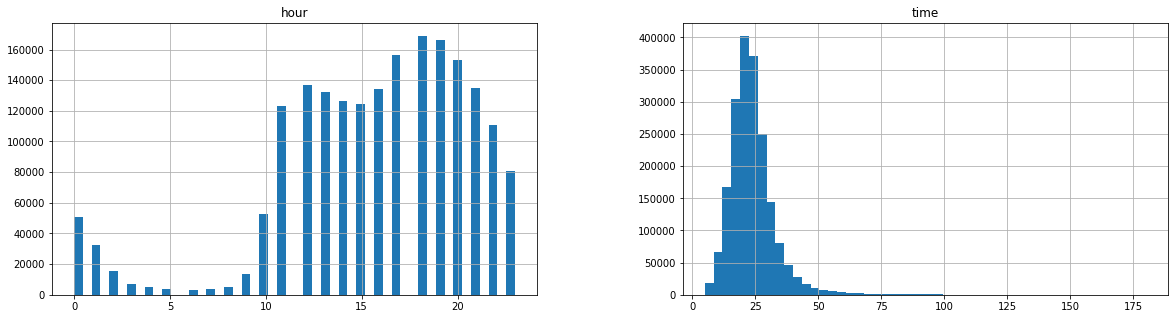

In [5]:
data.hist(bins=50, figsize=(20,5))
plt.show()

In [6]:
data['menu'].value_counts()

카페/디저트    250872
치킨        216915
한식        198293
분식        182742
패스트푸드     142021
피자        134081
족발/보쌈     121273
찜탕        120009
돈까스/일식    112875
야식        104304
중식         84524
아시안/양식     74808
회          74467
배달전문업체     57895
도시락        47435
심부름        17868
Name: menu, dtype: int64

In [7]:
menu = data['menu'].unique()
menu

array(['도시락', '돈까스/일식', '배달전문업체', '분식', '심부름', '아시안/양식', '야식', '족발/보쌈',
       '찜탕', '치킨', '패스트푸드', '피자', '한식', '회', '카페/디저트', '중식'], dtype=object)

In [8]:
menu = ['도시락', '돈까스/일식', '배달전문업체', '분식', '심부름', '아시안/양식', '야식', '족발/보쌈', '찜탕', '치킨', '패스트푸드', '피자', '한식', '회', '카페/디저트', '중식']

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '카페/디저트'),
  Text(1, 0, '치킨'),
  Text(2, 0, '한식'),
  Text(3, 0, '분식'),
  Text(4, 0, '패스트푸드'),
  Text(5, 0, '피자'),
  Text(6, 0, '찜탕'),
  Text(7, 0, '족발/보쌈'),
  Text(8, 0, '돈까스/일식'),
  Text(9, 0, '야식'),
  Text(10, 0, '중식'),
  Text(11, 0, '아시안/양식')])

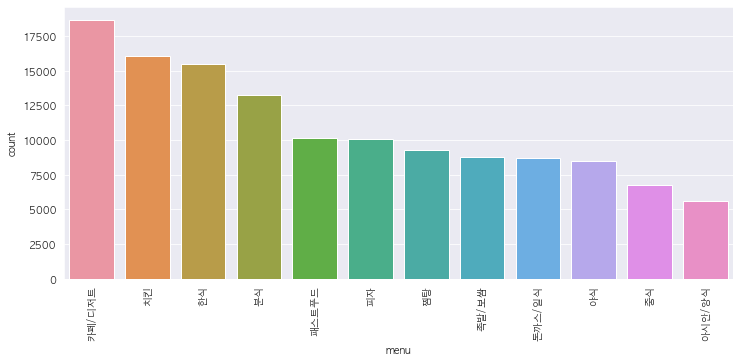

In [34]:
from matplotlib import font_manager, rc
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

#row가 너무 많은 것 같아서 무의미한 행을 삭제하려 한다. 
#메뉴별 데이터 수 확인하기 
plt.figure(figsize =(12, 5))
sns.countplot(data['menu'], order = data['menu'].value_counts().index)
plt.xticks(rotation = 90)

In [13]:
#메뉴 종류를 줄이기 위해, 메뉴에서 주문 수가 적은 하위 4개 없애기로 했다. 
#심부름, 도시락, 배달전문업체, 회 제거
 
index = data[data['menu'] == "회"].index
data = data.drop(index)
data

,date,hour,menu,do,city,time
1,2019-07-17,0,돈까스/일식,경기도,의정부시,13.02
2,2019-07-17,0,돈까스/일식,충청북도,제천시,15.03
5,2019-07-17,0,분식,경기도,의정부시,23.68
6,2019-07-17,0,분식,서울특별시,구로구,23.97
8,2019-07-17,0,아시안/양식,경기도,의정부시,17.49
...,...,...,...,...,...,...
1940365,2020-09-30,23,한식,서울특별시,도봉구,14.57
1940366,2020-09-30,23,한식,인천광역시,부평구,33.89
1940367,2020-09-30,23,한식,전라북도,군산시,16.45
1940368,2020-09-30,23,한식,제주특별자치도,서귀포시,18.34


In [11]:
index = data[data['menu'] == "심부름"].index
data = data.drop(index)
data

,date,hour,menu,do,city,time
1,2019-07-17,0,돈까스/일식,경기도,의정부시,13.02
2,2019-07-17,0,돈까스/일식,충청북도,제천시,15.03
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,19.49
4,2019-07-17,0,배달전문업체,경기도,의정부시,19.33
5,2019-07-17,0,분식,경기도,의정부시,23.68
...,...,...,...,...,...,...
1940377,2020-09-30,23,회,경기도,화성시,30.40
1940378,2020-09-30,23,회,서울특별시,도봉구,30.97
1940379,2020-09-30,23,회,서울특별시,은평구,20.65
1940380,2020-09-30,23,회,전라북도,군산시,27.45


In [12]:
index = data[data['menu'] == "배달전문업체"].index
data = data.drop(index)
data

,date,hour,menu,do,city,time
1,2019-07-17,0,돈까스/일식,경기도,의정부시,13.02
2,2019-07-17,0,돈까스/일식,충청북도,제천시,15.03
5,2019-07-17,0,분식,경기도,의정부시,23.68
6,2019-07-17,0,분식,서울특별시,구로구,23.97
8,2019-07-17,0,아시안/양식,경기도,의정부시,17.49
...,...,...,...,...,...,...
1940377,2020-09-30,23,회,경기도,화성시,30.40
1940378,2020-09-30,23,회,서울특별시,도봉구,30.97
1940379,2020-09-30,23,회,서울특별시,은평구,20.65
1940380,2020-09-30,23,회,전라북도,군산시,27.45


In [14]:
data = data.reset_index(drop=True)

In [15]:
data

,date,hour,menu,do,city,time
0,2019-07-17,0,돈까스/일식,경기도,의정부시,13.02
1,2019-07-17,0,돈까스/일식,충청북도,제천시,15.03
2,2019-07-17,0,분식,경기도,의정부시,23.68
3,2019-07-17,0,분식,서울특별시,구로구,23.97
4,2019-07-17,0,아시안/양식,경기도,의정부시,17.49
...,...,...,...,...,...,...
1742712,2020-09-30,23,한식,서울특별시,도봉구,14.57
1742713,2020-09-30,23,한식,인천광역시,부평구,33.89
1742714,2020-09-30,23,한식,전라북도,군산시,16.45
1742715,2020-09-30,23,한식,제주특별자치도,서귀포시,18.34


In [16]:
#날짜를 2020년 05월로 범위를 좁혀서 데이터 수를 줄인다. 

index = []
del_date = re.compile("2020-05-")

for i in range(0,len(data)):
    if del_date.match(data['date'][i]):
        index.append(i)

data = data.iloc[index, :]
data = data.reset_index(drop=True)
data

,date,hour,menu,do,city,time
0,2020-05-01,0,돈까스/일식,경기도,고양시 덕양구,11.33
1,2020-05-01,0,돈까스/일식,경기도,광명시,19.74
2,2020-05-01,0,돈까스/일식,경기도,의정부시,21.24
3,2020-05-01,0,돈까스/일식,경기도,평택시,12.32
4,2020-05-01,0,돈까스/일식,전라북도,군산시,14.67
...,...,...,...,...,...,...
131401,2020-05-31,23,한식,인천광역시,부평구,42.29
131402,2020-05-31,23,한식,전라북도,군산시,35.55
131403,2020-05-31,23,한식,제주특별자치도,서귀포시,10.58
131404,2020-05-31,23,한식,충청남도,서산시,18.69


In [17]:
#서울특별시 내로 줄이기로 한다.
index = []
do = re.compile("서울특별시")

for i in range(0, len(data)):
    if do.match(data['do'][i]):
        index.append(i)
        
seoul = data.iloc[index, :]
seoul = seoul.reset_index(drop=True)
seoul

,date,hour,menu,do,city,time
0,2020-05-01,0,분식,서울특별시,구로구,26.92
1,2020-05-01,0,분식,서울특별시,금천구,22.81
2,2020-05-01,0,야식,서울특별시,구로구,33.02
3,2020-05-01,0,야식,서울특별시,금천구,22.75
4,2020-05-01,0,야식,서울특별시,영등포구,18.93
...,...,...,...,...,...,...
20972,2020-05-31,23,피자,서울특별시,도봉구,19.76
20973,2020-05-31,23,한식,서울특별시,구로구,21.59
20974,2020-05-31,23,한식,서울특별시,금천구,16.05
20975,2020-05-31,23,한식,서울특별시,영등포구,33.09


In [18]:
seoul = seoul.drop(['do'], axis = 1)
seoul

,date,hour,menu,city,time
0,2020-05-01,0,분식,구로구,26.92
1,2020-05-01,0,분식,금천구,22.81
2,2020-05-01,0,야식,구로구,33.02
3,2020-05-01,0,야식,금천구,22.75
4,2020-05-01,0,야식,영등포구,18.93
...,...,...,...,...,...
20972,2020-05-31,23,피자,도봉구,19.76
20973,2020-05-31,23,한식,구로구,21.59
20974,2020-05-31,23,한식,금천구,16.05
20975,2020-05-31,23,한식,영등포구,33.09


In [22]:
df.to_csv("data_05월_서울.csv", encoding = 'utf-8')

In [28]:
#치킨 데이터만 뽑아내기
index = seoul[seoul['menu'] == "치킨"].index

food = df.iloc[index, :]
food

NameError: name 'df' is not defined

In [59]:
food.reset_index(inplace = True)
food

,index,date,hour,menu,city,time
0,17,2020-05-01,0,한식,영등포구,19.14
1,31,2020-05-01,1,한식,금천구,26.78
2,35,2020-05-01,2,한식,영등포구,18.05
3,38,2020-05-01,3,한식,영등포구,18.19
4,41,2020-05-01,4,한식,영등포구,16.90
...,...,...,...,...,...,...
2563,20949,2020-05-31,22,한식,은평구,25.85
2564,20973,2020-05-31,23,한식,구로구,21.59
2565,20974,2020-05-31,23,한식,금천구,16.05
2566,20975,2020-05-31,23,한식,영등포구,33.09


In [60]:
food = food.iloc[:, 1:]

In [61]:
food = food.drop(['menu'], axis=1)
food

,date,hour,city,time
0,2020-05-01,0,영등포구,19.14
1,2020-05-01,1,금천구,26.78
2,2020-05-01,2,영등포구,18.05
3,2020-05-01,3,영등포구,18.19
4,2020-05-01,4,영등포구,16.90
...,...,...,...,...
2563,2020-05-31,22,은평구,25.85
2564,2020-05-31,23,구로구,21.59
2565,2020-05-31,23,금천구,16.05
2566,2020-05-31,23,영등포구,33.09


In [62]:
chicken.to_csv("한식_05월.csv", encoding ='utf-8')

### 주문 시간 KDE(커널 밀도 추정) Plot

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.09 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.09 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x14a97d3d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

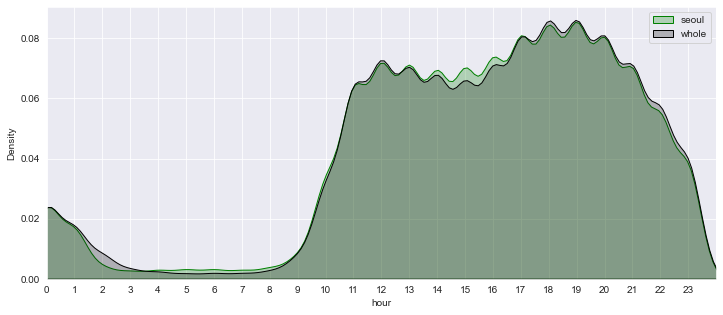

In [19]:
#주문 시간으로 kdeplot 그려보기 
#서울 데이터와 전체 데이터를 비교해보고자 했다.

plt.figure(figsize = (12, 5))

sns.set_style("darkgrid")
p1=sns.kdeplot(seoul['hour'], bw=.09, shade = True, color = 'green')
p2=sns.kdeplot(data['hour'],bw=.09, shade=True, color ='black')
plt.legend(['seoul', 'whole'])
plt.xlim(0,24)
plt.xticks(range(0,24))

KDE plot(Kernel Density Estimation, 커널 밀도 추정)
- 어떤 변수의 밀도를 추정한다는 것은, 확률밀도함수를 추정하는 것과 동일한 말이다. 
- KDE는 non-parametric 밀도 추정 방법 중 하나로서, 관측된 데이터들로부터 히스토그램을 구한 후, 구해진 히스토그램을 정규화하여 확률밀도함수로 사용하는 것이다. 


시간대별 주문 밀도는 18시가 가장 많고, 그다음 19시, 17시 순이다. 주로 저녁 시간대가 주문이 몰림. 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

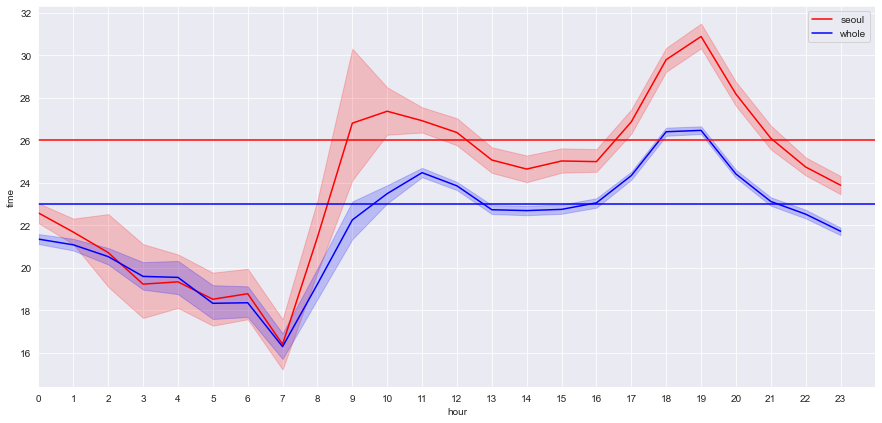

In [20]:
#x축은 주문 시간, y축은 배달 소요 시간으로 lineplot
#오전 중에는 11-12시, 오후 중에는 18시가 배달 소요 시간이 가장 길다

mean_time = int(np.mean(seoul['time']))
total_mean_time = int(np.mean(data['time']))

plt.figure(figsize = (15, 7))


p1=sns.lineplot(x = 'hour', y='time', data=seoul, color ='red' )
p2=sns.lineplot(x='hour', y='time', data=data, color = 'blue')

plt.axhline(mean_time,label='Seoul Mean', color ='red')
plt.axhline(total_mean_time,label='Total Mean', color ='blue')

plt.legend(['seoul', 'whole'])
plt.xlim(0,24)
plt.xticks(range(0,24))
plt

In [21]:
seoul

,date,hour,menu,city,time
0,2020-05-01,0,분식,구로구,26.92
1,2020-05-01,0,분식,금천구,22.81
2,2020-05-01,0,야식,구로구,33.02
3,2020-05-01,0,야식,금천구,22.75
4,2020-05-01,0,야식,영등포구,18.93
...,...,...,...,...,...
20972,2020-05-31,23,피자,도봉구,19.76
20973,2020-05-31,23,한식,구로구,21.59
20974,2020-05-31,23,한식,금천구,16.05
20975,2020-05-31,23,한식,영등포구,33.09


In [22]:
index=[]
index = seoul[seoul['city'] == "구로구"].index

guro=seoul.iloc[index,:]
guro

,date,hour,menu,city,time
0,2020-05-01,0,분식,구로구,26.92
2,2020-05-01,0,야식,구로구,33.02
9,2020-05-01,0,치킨,구로구,22.01
14,2020-05-01,0,패스트푸드,구로구,24.94
18,2020-05-01,1,분식,구로구,32.03
...,...,...,...,...,...
20962,2020-05-31,23,치킨,구로구,29.11
20968,2020-05-31,23,카페/디저트,구로구,17.15
20970,2020-05-31,23,패스트푸드,구로구,31.97
20971,2020-05-31,23,피자,구로구,43.37


<AxesSubplot:xlabel='hour', ylabel='time'>

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_

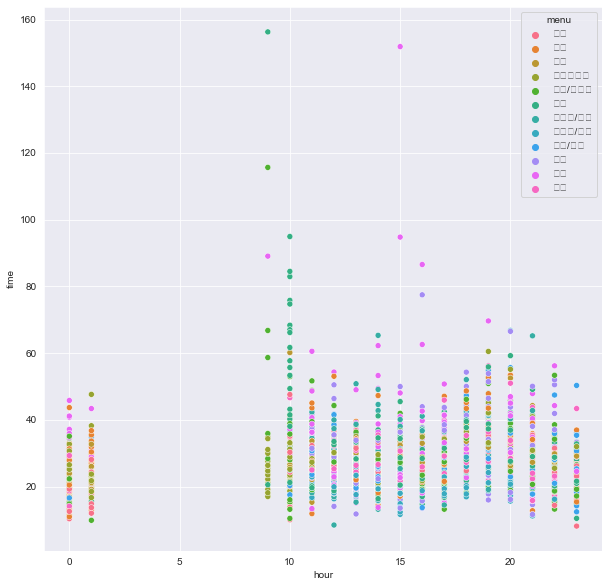

In [23]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='hour', y='time', data=guro, hue='menu')

In [25]:
encoding = guro.copy()

In [26]:
encoding['city'].value_counts()

구로구     4636
영등포구    4021
금천구     3375
도봉구     2970
은평구     2364
동작구     1362
양천구     1236
관악구      656
노원구      328
서대문구      24
강서구        5
Name: city, dtype: int64

In [27]:
#Mapping ordinal features
city_mapping = {
    '구로구': 0,
    '영등포구': 1,
    '동작구': 2,
    '구로구': 3,
    '은평구': 4,
    '금천구': 5,
    '도봉구': 6,
    '양천구':7,
    '관악구': 8,
    '노원구': 9,
    '강남구': 10,
    '강동구': 11,
    '서초구': 12,
    '서대문구': 13,
    '강서구': 14
}
encoding['city'] = encoding['city'].map(city_mapping)

#월요일(1), 화(2), 수(3), 목(4), 금(5), 토(6), 일(7) mapping 시키기

date_mapping = {
    '2020-05-04':1, '2020-05-11':1,'2020-05-25': 1,
    '2020-05-05':2,'2020-05-19':2,'2020-05-26':2,'2020-05-12': 2,
    '2020-05-20':3,'2020-05-13':3,'2020-05-06':3,'2020-05-27': 3,
    '2020-05-21':4,'2020-05-07':4,'2020-05-28':4,'2020-05-14': 4,
    '2020-05-15':5,'2020-05-01':5,'2020-05-22':5,'2020-05-08': 5,
    '2020-05-09':6,'2020-05-23':6,'2020-05-02':6,'2020-05-16':6,'2020-05-30':6,'2020-05-29': 6,
    '2020-05-03':7,'2020-05-10':7,'2020-05-17':7,'2020-05-24':7,'2020-05-31': 7
}
encoding['date'] = encoding['date'].map(date_mapping)


menu_mapping ={
    '치킨': 1,
    '한식': 2,
    '카페/디저트': 3,
    '패스트푸드': 4,
    '분식': 5,
    '족발/보쌈': 6,
    '야식': 7,
    '돈까스/일식': 8,
    '피자': 9,
    '중식': 10,
    '찜탕': 11,
    '아시안/양식': 12
}
encoding['menu'] = encoding['menu'].map(menu_mapping)

encoding

,date,hour,menu,city,time
0,5,0,5,3,26.92
1,5,0,5,5,22.81
2,5,0,7,3,33.02
3,5,0,7,5,22.75
4,5,0,7,1,18.93
...,...,...,...,...,...
20972,7,23,9,6,19.76
20973,7,23,2,3,21.59
20974,7,23,2,5,16.05
20975,7,23,2,1,33.09


In [109]:
corr_matrix = encoding.corr()

In [110]:
corr_matrix['time'].sort_values(ascending=False)

time    1.000000
city    0.156872
hour    0.096031
date    0.008474
menu   -0.035971
Name: time, dtype: float64

In [31]:
chicken

,date,hour,city,time
0,2020-05-01,0,구로구,22.01
1,2020-05-01,0,금천구,16.45
2,2020-05-01,0,동작구,26.35
3,2020-05-01,0,영등포구,20.37
4,2020-05-01,0,은평구,21.76
...,...,...,...,...
2917,2020-05-31,23,금천구,17.93
2918,2020-05-31,23,도봉구,20.15
2919,2020-05-31,23,동작구,22.21
2920,2020-05-31,23,영등포구,29.67


<AxesSubplot:xlabel='hour', ylabel='time'>

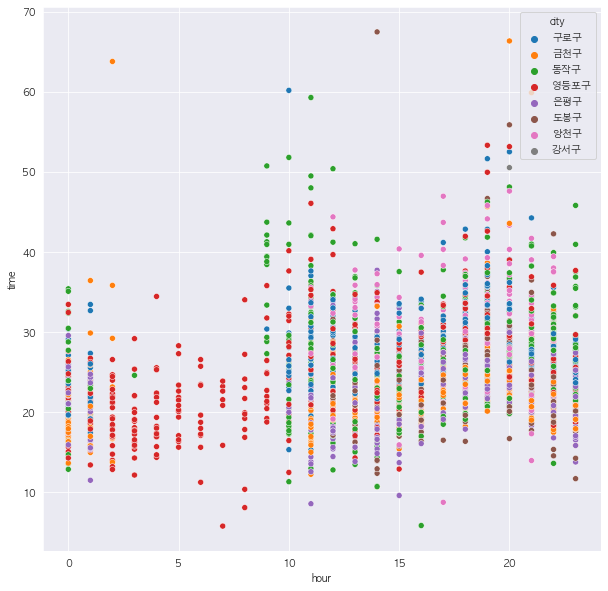

In [35]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='hour', y='time', data=chicken, hue='city')